灰色系统理论：用颜色深浅反应信息量的多少，越白的系统信息越多越清楚。白系统就是信息充足，内容清晰的；黑色系统就是信息量少的。而之间的灰色系统，信息不完全。

关联分析就是系统地分析因素，判断一个系统中哪些因素是主要的，哪些是次要的

现有因素分析的量化方法，大都是数理统计法如回归分析、方差分析、主要成分分析等，这些方法都有下述弱点:
(1)要求大量数据，数据量少难以找到统计规律
(2)要求分布是典型的(线性的、指数的或对数的)，即使是典型的并非都能处理
(3)计算工作量大，一般需要计算机帮助
(4)有时可能出现反常情况，如正相关则断为负相关，以至正确现象受到歪曲和颠倒
##尤其是我国统计数据十分有限,而且现有数据灰度较大，许多数据都出现几次大起大落,没有典型的分布规律。因此,采用数理统计方法往往难以奏效。

以上的方法极度依赖于数据的准确性

灰色关联度分析(Grey Relation AnalysisGRA)，是一种多因素统计分析的方法。灰色关联分析方法弥它对样本量的多少和样本有无规律都同样适用,而且计算量补了采用数理统计方法作系统分析所导致的缺憾,十分方便,更不会出现量化结果与定性分析结果不符的情况。
·灰色关联分析的基本思想是根据序列曲线几何形状的相似程度来判断其联系是否紧密。曲线越接近,相应序列之间的关联度就越大,反之就越小。
·对一个抽象的系统或现象进行分析,首先要选准反映系统行为特征的数据序列,称为找系统行为的映射量,用映射量来间接地表征系统行为。例如,用国民平均接受教育的年数来反映教育发达程度,用刑事案件的发案率来反映社会治安面貌和社会秩序,用医院挂号次数来反映国民的健康水平等。有了系统行为特征数据和相关因素的数据,即可作出各个序列的图形,从直观上进行分析。


曲线几何形态越相似
发展变化态势就越接近
其关联程度就越大

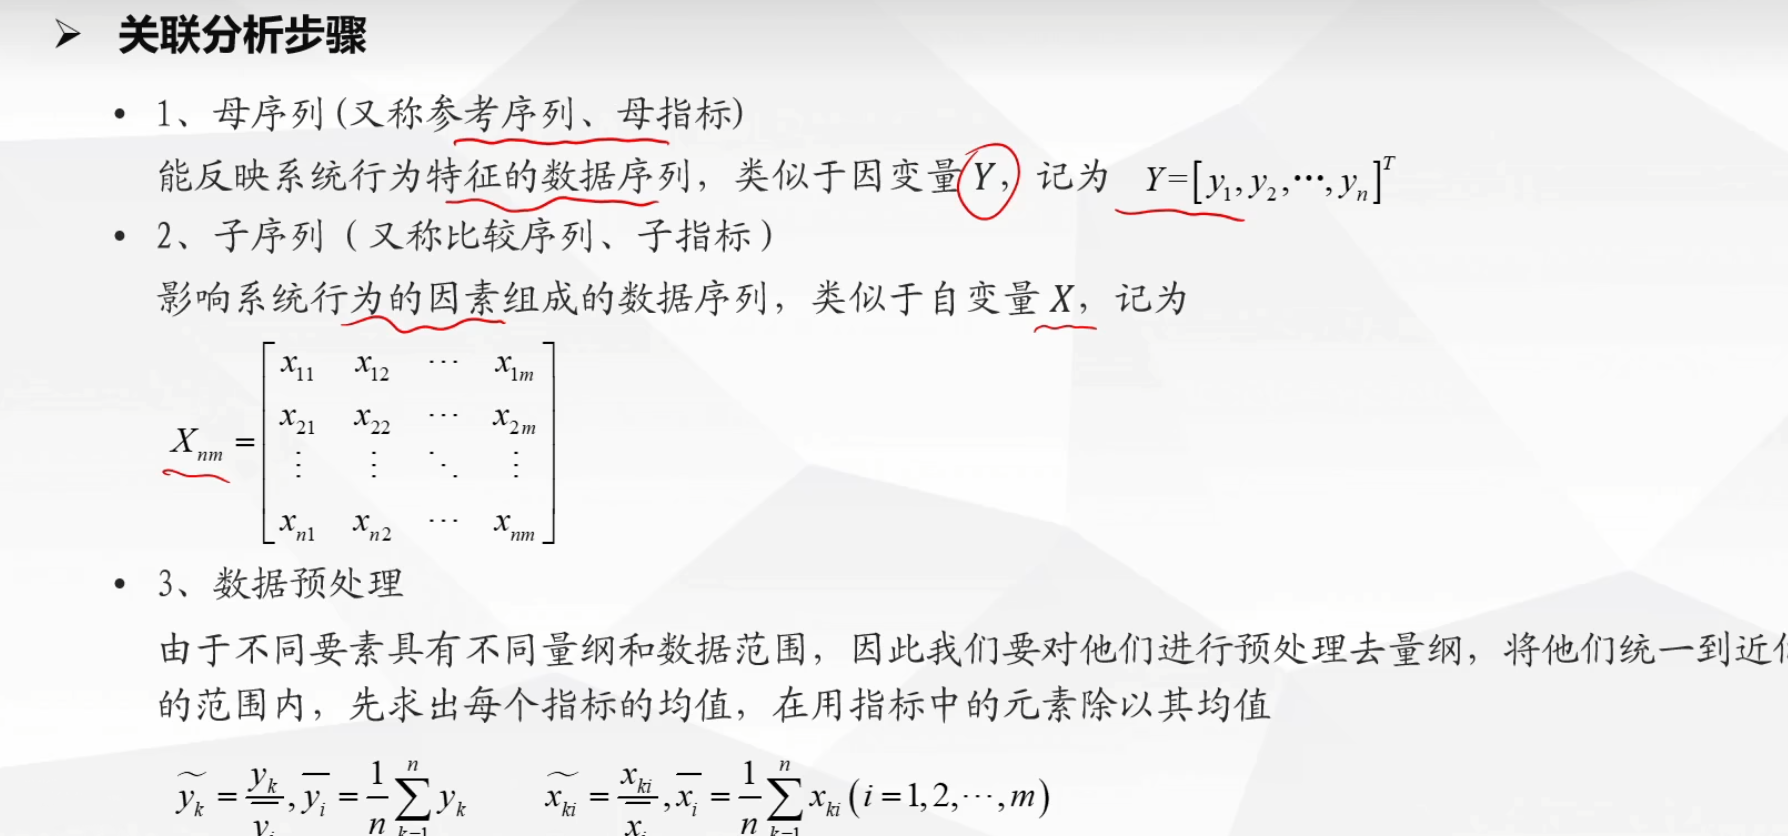

In [1]:
from IPython.display import Image
Image(filename="C:/Users/dash2/Pictures/Screenshots/屏幕截图 2024-07-23 173126.png")

这里的去量纲不是通过归一化，而是除以序列均值。

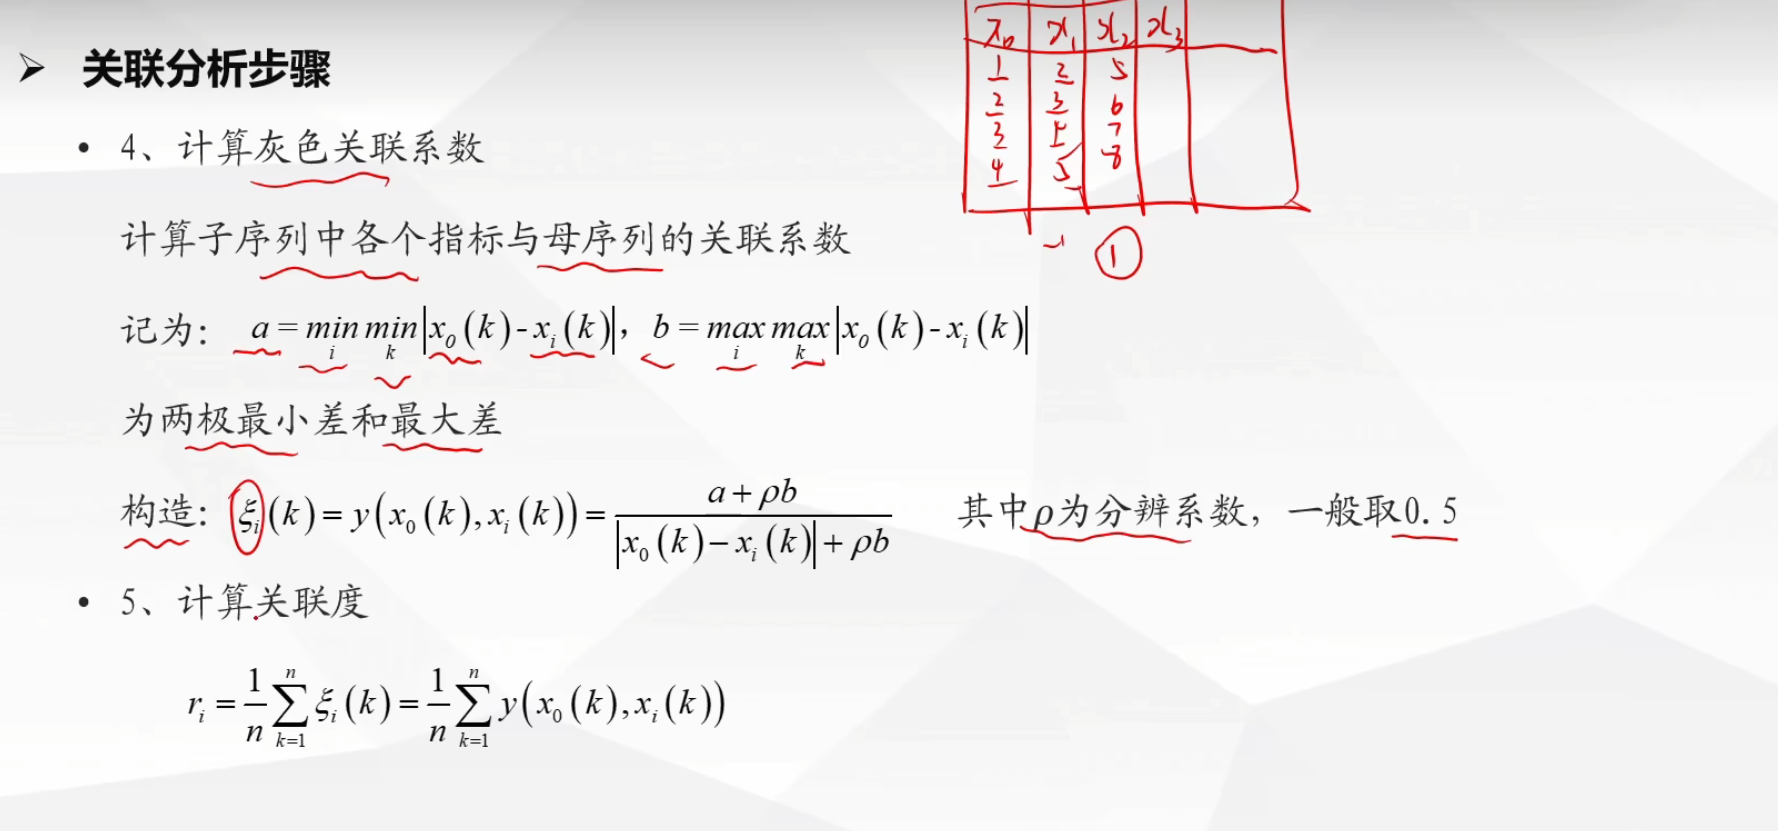

In [2]:
from IPython.display import Image
Image(filename="C:/Users/dash2/Pictures/Screenshots/屏幕截图 2024-07-23 173703.png")

构建母序列可以选取所有选择中的最大值，注意：不是所有因素的最值而是所有候选项的各个最大值组成一个母序列

灰色关联分析

In [21]:
import numpy as np
#进行预处理
a = np.array([[55,24,10],
              [65,38,22],
              [75,40,18],
              [100,50,20]])
Mean = np.mean(a, axis=0)
a_pre = a/Mean
print("预处理的结果",a_pre)

预处理的结果 [[0.74576271 0.63157895 0.57142857]
 [0.88135593 1.         1.25714286]
 [1.01694915 1.05263158 1.02857143]
 [1.3559322  1.31578947 1.14285714]]


In [23]:
#母序列
a_mom = a_pre[:,0]
#子序列
a_son = a_pre[:,1:]
absx = np.abs(a_son - np.tile(a_mom.reshape(-1,1),(1,a_son.shape[1])))
a = np.min(absx)
b = np.max(absx)
rho = 0.5 #分辨系数取0.5
gamma = (a + b*rho)/(absx + rho*b)
gamma_mean = np.mean(gamma,axis=0)
print("灰色关联度：",gamma_mean)

灰色关联度： [0.76966578 0.60058464]


灰色关联评价

In [38]:
import numpy as np
X = np.array([[9, 0, 0, 0], [8, 3, 0.9, 0.5], [6, 7, 0.2, 1]])
#标准化
Z = X / np.sqrt(np.sum(X ** 2, axis=0))
print("标准化矩阵", Z)

标准化矩阵 [[0.66896473 0.         0.         0.        ]
 [0.59463532 0.3939193  0.97618706 0.4472136 ]
 [0.44597649 0.91914503 0.21693046 0.89442719]]


In [49]:
Mean1 = np.mean(Z, axis=0)
x_pre = Z/Mean1
print('预处理结果',x_pre)

预处理结果 [[1.17391304 0.         0.         0.        ]
 [1.04347826 0.9        2.45454545 1.        ]
 [0.7826087  2.1        0.54545455 2.        ]]


In [61]:
x_mom = np.max(x_pre,axis=1)
x_son = x_pre
absx2 = np.abs(x_son - np.tile(x_mom.reshape(-1,1),(1,x_son.shape[1])))

a1 = np.min(absx2)
b1 = np.max(absx2)

rho = 0.5 #分辨系数取0.5

gamma1 = (a1 + b1*rho)/(absx2 + rho*b1)
weight = np.mean(gamma1,axis=0)/np.sum(np.mean(gamma1,axis=0))
#加权得分计算
score = np.sum(x_son * np.tile(weight,(x_son.shape[0],1)),axis=1)
score_s = score/np.sum(score)
print(score_s)

[0.0990128  0.45160804 0.44937917]
